In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
os.chdir(r"C:\Users\a0105\Desktop\DSC\ddd\data")

In [3]:
price_processing = pd.read_pickle('축산물_시계열 데이터로 변환(전국).pkl')

In [4]:
price_processing 

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013-01-06,13875.600000,3044.800000,2013,1
1,2013-01-13,13213.333333,2984.000000,2013,1
2,2013-01-20,12588.833333,2904.000000,2013,1
3,2013-01-27,12323.833333,2959.666667,2013,1
4,2013-02-03,12325.166667,2862.833333,2013,2
...,...,...,...,...,...
293,2018-08-19,16835.000000,5305.000000,2018,8
294,2018-08-26,17555.000000,5207.500000,2018,8
295,2018-09-02,18369.000000,5548.000000,2018,9
296,2018-09-09,18757.000000,5754.000000,2018,9


# 관측데이터

In [5]:
weather = pd.read_csv('04. 관측데이터.csv', encoding='utf-8-sig')

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537840 entries, 0 to 1537839
Data columns (total 60 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   도                    1537840 non-null  object 
 1   지역                   1537840 non-null  object 
 2   일시                   1537840 non-null  object 
 3   평균기온(°C)             1520260 non-null  float64
 4   최저기온(°C)             1522829 non-null  float64
 5   최저기온 시각(hhmi)        1391238 non-null  float64
 6   최고기온(°C)             1522863 non-null  float64
 7   최고기온 시각(hhmi)        1391257 non-null  float64
 8   강수 계속시간(hr)          377705 non-null   float64
 9   10분 최다 강수량(mm)       330785 non-null   float64
 10  10분 최다강수량 시각(hhmi)   248265 non-null   float64
 11  1시간 최다강수량(mm)        354936 non-null   float64
 12  1시간 최다 강수량 시각(hhmi)  272862 non-null   float64
 13  일강수량(mm)             569557 non-null   float64
 14  최대 순간 풍속(m/s)        1070438 non-null  float64
 15

In [7]:
# 모든 칼럼 다 보기
pd.options.display.max_columns = 60
weather.head(5)

,도,지역,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사 시각(hhmi),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,강원도,강릉,1911-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원도,강릉,1911-10-04,NaN,12.2,NaN,26.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강원도,강릉,1911-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강원도,강릉,1911-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,강원도,강릉,1911-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

# 필요한 칼럼 추출
columns = ['도','지역','일시','평균기온(°C)', '최저기온(°C)','최고기온(°C)','합계 일조 시간(hr)',
          '1시간 최다일사량(MJ/m2)','합계 일사(MJ/m2)','평균 지면온도(°C)','일강수량(mm)',
          '1시간 최다강수량(mm)','10분 최다 강수량(mm)','최소 상대습도(%)','평균 상대습도(%)']
weather = weather[columns].copy()
weather.head()

,도,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),합계 일조 시간(hr),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),평균 지면온도(°C),일강수량(mm),1시간 최다강수량(mm),10분 최다 강수량(mm),최소 상대습도(%),평균 상대습도(%)
0,강원도,강릉,1911-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원도,강릉,1911-10-04,NaN,12.2,26.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강원도,강릉,1911-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강원도,강릉,1911-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,강원도,강릉,1911-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 일시 데이터가 객체 이므로 Datetime으로 변환
weather['일시'] = pd.to_datetime(weather['일시'])
weather.dtypes

도                           object
지역                          object
일시                  datetime64[ns]
평균기온(°C)                   float64
최저기온(°C)                   float64
최고기온(°C)                   float64
합계 일조 시간(hr)               float64
1시간 최다일사량(MJ/m2)           float64
합계 일사(MJ/m2)               float64
평균 지면온도(°C)                float64
일강수량(mm)                   float64
1시간 최다강수량(mm)              float64
10분 최다 강수량(mm)             float64
최소 상대습도(%)                 float64
평균 상대습도(%)                 float64
dtype: object

In [10]:
# 일시 기준으로 2013-01-01 ~ 2018-12-31 데이터만 추출
df_weather = weather[weather['일시'].isin(pd.date_range(start='2013-01-01', end='2018-12-31'))]

# 인덱스 리셋팅
df_weather = df_weather.reset_index(drop=True)
df_weather.head()

,도,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),합계 일조 시간(hr),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),평균 지면온도(°C),일강수량(mm),1시간 최다강수량(mm),10분 최다 강수량(mm),최소 상대습도(%),평균 상대습도(%)
0,강원도,강릉,2013-01-01,-1.9,-6.7,3.8,6.5,1.71,8.97,-1.2,NaN,NaN,NaN,39.0,50.6
1,강원도,강릉,2013-01-02,-6.0,-9.9,-1.3,8.9,2.01,11.62,-2.2,0.5,NaN,NaN,15.0,29.9
2,강원도,강릉,2013-01-03,-7.5,-11.1,-0.7,9.0,2.02,11.66,-4.4,NaN,NaN,NaN,14.0,25.8
3,강원도,강릉,2013-01-04,-4.9,-10.6,1.8,9.0,1.98,11.57,-4.3,NaN,NaN,NaN,15.0,31.1
4,강원도,강릉,2013-01-05,-1.7,-5.4,2.8,8.9,1.95,11.31,-3.0,NaN,NaN,NaN,20.0,30.4


In [11]:
# 추출한 데이터 결측치 다시 집계해보기
df_weather.isnull().sum()

도                        0
지역                       0
일시                       0
평균기온(°C)               199
최저기온(°C)                28
최고기온(°C)                36
합계 일조 시간(hr)           319
1시간 최다일사량(MJ/m2)    119447
합계 일사(MJ/m2)        119446
평균 지면온도(°C)            238
일강수량(mm)            130759
1시간 최다강수량(mm)       159321
10분 최다 강수량(mm)      159334
최소 상대습도(%)              68
평균 상대습도(%)             334
dtype: int64

In [12]:

df_weather = df_weather.drop(['1시간 최다일사량(MJ/m2)','합계 일사(MJ/m2)','일강수량(mm)','10분 최다 강수량(mm)',
                '1시간 최다강수량(mm)'], axis=1).copy()
df_weather

,도,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),합계 일조 시간(hr),평균 지면온도(°C),최소 상대습도(%),평균 상대습도(%)
0,강원도,강릉,2013-01-01,-1.9,-6.7,3.8,6.5,-1.2,39.0,50.6
1,강원도,강릉,2013-01-02,-6.0,-9.9,-1.3,8.9,-2.2,15.0,29.9
2,강원도,강릉,2013-01-03,-7.5,-11.1,-0.7,9.0,-4.4,14.0,25.8
3,강원도,강릉,2013-01-04,-4.9,-10.6,1.8,9.0,-4.3,15.0,31.1
4,강원도,강릉,2013-01-05,-1.7,-5.4,2.8,8.9,-3.0,20.0,30.4
...,...,...,...,...,...,...,...,...,...,...
205700,충청북도,충주,2018-12-27,-7.9,-10.7,-3.0,7.9,-2.7,13.0,27.1
205701,충청북도,충주,2018-12-28,-11.0,-13.4,-6.4,7.9,-4.2,27.0,44.3
205702,충청북도,충주,2018-12-29,-8.9,-14.7,-2.5,7.9,-4.5,17.0,45.9
205703,충청북도,충주,2018-12-30,-8.9,-14.3,-1.0,7.7,-4.3,25.0,53.8


In [13]:
# 다시 결측치 확인
df_weather.isnull().sum()

도                 0
지역                0
일시                0
평균기온(°C)        199
최저기온(°C)         28
최고기온(°C)         36
합계 일조 시간(hr)    319
평균 지면온도(°C)     238
최소 상대습도(%)       68
평균 상대습도(%)      334
dtype: int64

In [14]:
# 칼럼명에 측정단위 문자가 들어가 있어 코드 작성시 불편함 우려로 인해 칼럼 이름 재작성
df_weather = df_weather.rename(columns={'평균기온(°C)':'평균기온','최저기온(°C)':'최저기온','최고기온(°C)':'최고기온',
                          '합계 일조 시간(hr)':'합계일조시간','평균 지면온도(°C)':'평균지면온도',
                          '최소 상대습도(%)':'최소상대습도(%)','평균 상대습도(%)':'평균상대습도(%)'}).copy()
df_weather.head()

,도,지역,일시,평균기온,최저기온,최고기온,합계일조시간,평균지면온도,최소상대습도(%),평균상대습도(%)
0,강원도,강릉,2013-01-01,-1.9,-6.7,3.8,6.5,-1.2,39.0,50.6
1,강원도,강릉,2013-01-02,-6.0,-9.9,-1.3,8.9,-2.2,15.0,29.9
2,강원도,강릉,2013-01-03,-7.5,-11.1,-0.7,9.0,-4.4,14.0,25.8
3,강원도,강릉,2013-01-04,-4.9,-10.6,1.8,9.0,-4.3,15.0,31.1
4,강원도,강릉,2013-01-05,-1.7,-5.4,2.8,8.9,-3.0,20.0,30.4


In [15]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205705 entries, 0 to 205704
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   도          205705 non-null  object        
 1   지역         205705 non-null  object        
 2   일시         205705 non-null  datetime64[ns]
 3   평균기온       205506 non-null  float64       
 4   최저기온       205677 non-null  float64       
 5   최고기온       205669 non-null  float64       
 6   합계일조시간     205386 non-null  float64       
 7   평균지면온도     205467 non-null  float64       
 8   최소상대습도(%)  205637 non-null  float64       
 9   평균상대습도(%)  205371 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 15.7+ MB


In [16]:
del df_weather['도']
del df_weather['지역']

In [17]:
df_weather_group = df_weather.groupby(['일시']).mean()

In [18]:
df_weather_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2013-01-01 to 2018-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온       2191 non-null   float64
 1   최저기온       2191 non-null   float64
 2   최고기온       2191 non-null   float64
 3   합계일조시간     2191 non-null   float64
 4   평균지면온도     2191 non-null   float64
 5   최소상대습도(%)  2191 non-null   float64
 6   평균상대습도(%)  2191 non-null   float64
dtypes: float64(7)
memory usage: 136.9 KB


In [19]:
df_weather_group.shape

(2191, 7)

In [20]:
day_7 = pd.date_range(start = df_weather['일시'][0], end = df_weather['일시'][len(df_weather)-1],freq ='W') #주별 데이터 생성

In [21]:
day_7 = pd.DataFrame(day_7,columns=['주간날짜'])

In [22]:
day_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주간날짜    313 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.6 KB


In [23]:
def mean_week(day_, date_column, avg_column):
    
    avg_7 = []
    
    for x in range(len(day_)-1):
        
        a = []
        
        for i in range(len(date_column)):
            
            if date_column[i] >= day_[x] and date_column[i] < day_[x+1]:
                
                a.append(avg_column[i])
                
        avg_7.append(np.mean(a))
        
    return avg_7

In [24]:
df = pd.DataFrame()

df['평균기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균기온'])
df['최저기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최저기온'])
df['최고기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최고기온'])
df['평균지면온도'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균지면온도'])
df['최소상대습도(%)'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최소상대습도(%)'])
df['평균상대습도(%)'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균상대습도(%)'])

In [25]:
df.shape

(312, 6)

In [26]:
df = pd.concat([day_7,df],axis=1)

In [27]:
df.head()

,주간날짜,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,-0.757143,-4.642857,4.142857,-2.342857,17.000000,30.757143
1,2013-01-13,0.857143,-2.514286,5.357143,0.057143,36.285714,56.014286
2,2013-01-20,-0.414286,-3.300000,2.571429,-0.114286,44.428571,61.500000
3,2013-01-27,2.885714,-1.657143,7.985714,0.414286,41.285714,59.685714
4,2013-02-03,-0.571429,-4.742857,4.171429,0.342857,26.571429,47.257143


In [28]:
merge_df = pd.merge(price_processing, df, how='inner', on=['주간날짜'])
merge_df.shape

(298, 11)

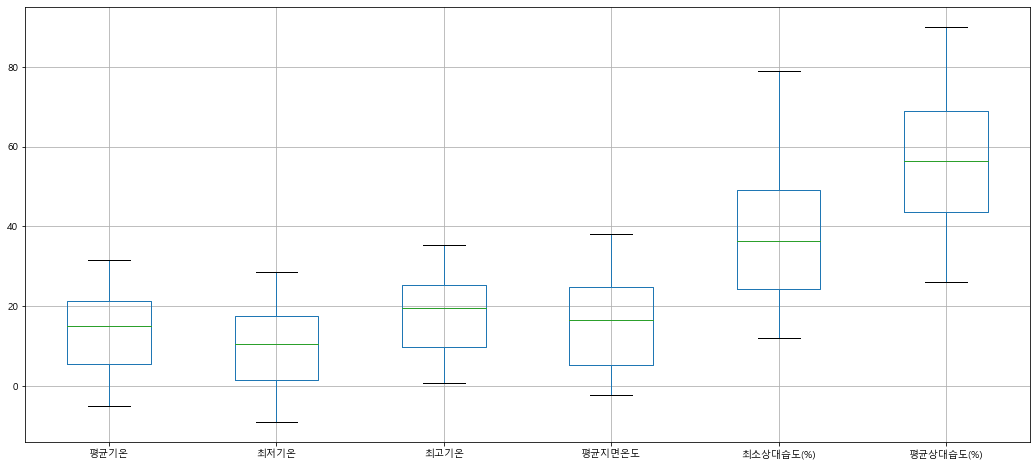

In [29]:
plt.figure(figsize = (18,8))
df.boxplot()

* 이상치 존재하지 않음.
* 대표값으로 평균 사용해도 괜찮음.

In [30]:
corr_data = merge_df.drop(['year','month'],axis=1).corr()
corr_data.style.background_gradient()

,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
한우 평균경매 금액_주간평균,1.000000,0.460125,0.096463,0.099865,0.095112,0.108233,0.093153,0.059286
돼지 탕박 경매 금액_주간평균,0.460125,1.000000,0.444366,0.450846,0.432088,0.445118,0.356590,0.311436
평균기온,0.096463,0.444366,1.000000,0.994636,0.996389,0.987219,0.580960,0.587612
최저기온,0.099865,0.450846,0.994636,1.000000,0.983834,0.979626,0.639618,0.638769
최고기온,0.095112,0.432088,0.996389,0.983834,1.000000,0.986277,0.528869,0.544180
평균지면온도,0.108233,0.445118,0.987219,0.979626,0.986277,1.000000,0.570843,0.581285
최소상대습도(%),0.093153,0.356590,0.580960,0.639618,0.528869,0.570843,1.000000,0.974699
평균상대습도(%),0.059286,0.311436,0.587612,0.638769,0.544180,0.581285,0.974699,1.000000


In [33]:
def mean_week(day_, date_column, avg_column):
    
    avg_7 = []
    
    for x in range(len(day_)-1):
        
        a = []
        
        for i in range(len(date_column)):
            
            if date_column[i] >= day_[x] and date_column[i] < day_[x+1]:
                
                a.append(avg_column[i])
                
        avg_7.append(np.median(a))
        
    return avg_7

In [34]:
df = pd.DataFrame()

df['평균기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균기온'])
df['최저기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최저기온'])
df['최고기온'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최고기온'])
df['평균지면온도'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균지면온도'])
df['최소상대습도(%)'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['최소상대습도(%)'])
df['평균상대습도(%)'] = mean_week(day_7['주간날짜'], df_weather_group.index, df_weather['평균상대습도(%)'])

In [35]:
df_median = pd.concat([day_7,df],axis=1)

merge_df = pd.merge(price_processing, df_median, how='inner', on=['주간날짜'])
merge_df.shape

(298, 11)

In [36]:
corr_data = merge_df.drop(['year','month'],axis=1).corr()
corr_data.style.background_gradient()

,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
한우 평균경매 금액_주간평균,1.000000,0.460125,0.093122,0.093594,0.092042,0.104275,0.110144,0.053319
돼지 탕박 경매 금액_주간평균,0.460125,1.000000,0.434638,0.445225,0.423031,0.435790,0.356078,0.305647
평균기온,0.093122,0.434638,1.000000,0.989624,0.991298,0.981424,0.561001,0.558633
최저기온,0.093594,0.445225,0.989624,1.000000,0.972544,0.971167,0.629012,0.616067
최고기온,0.092042,0.423031,0.991298,0.972544,1.000000,0.978858,0.497182,0.506068
평균지면온도,0.104275,0.435790,0.981424,0.971167,0.978858,1.000000,0.549307,0.558602
최소상대습도(%),0.110144,0.356078,0.561001,0.629012,0.497182,0.549307,1.000000,0.945791
평균상대습도(%),0.053319,0.305647,0.558633,0.616067,0.506068,0.558602,0.945791,1.000000


In [37]:
merge_df

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.600000,3044.800000,2013,1,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.333333,2984.000000,2013,1,1.4,-2.2,6.1,0.0,30.0,49.6
2,2013-01-20,12588.833333,2904.000000,2013,1,1.5,-2.2,2.7,0.1,40.0,64.9
3,2013-01-27,12323.833333,2959.666667,2013,1,3.8,-0.9,9.3,0.4,40.0,63.0
4,2013-02-03,12325.166667,2862.833333,2013,2,1.5,-1.9,4.5,0.8,22.0,48.4
...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,16835.000000,5305.000000,2018,8,25.1,21.3,27.9,26.2,54.0,72.4
294,2018-08-26,17555.000000,5207.500000,2018,8,23.2,20.9,27.2,24.5,54.0,77.4
295,2018-09-02,18369.000000,5548.000000,2018,9,22.4,19.6,25.9,24.4,40.0,60.1
296,2018-09-09,18757.000000,5754.000000,2018,9,19.4,16.0,23.3,22.1,62.0,77.3


In [38]:
merge_df.to_pickle('관측정보merge.pkl')